# Predicting stock prices using MLP and LSTM models

Candidate numbers: 26250, 

### Part 1: Introduction

The task of predicting stock market prices is challenging. Stock prediction is of interest to most investors due to its high volatility. Even now, some investors use a combination of technical and fundamental analysis to help them make better decisions about their equity market investments. 

A couple of previous studies have compared linear regression models to artificial neural networks (ANN) and showed that ANNs yielded a much higher profit. The main difference in this observation is that ANNs can identify non-linear patterns. The chaotic and non-linear nature of the stock markets makes ANNs more popular for predictions. In particular, the multilayer perceptron (MLP) and recurrent neural network (RNN) models are known for their reliability in analysing and processing sequential data like time series data. When we deal with predicting stock market prices, we are also dealing with time series data. Long short-term memory networks (LSTM) is a recent popular RNN architecture choice due to its sophisticated transformation of inputs. 

Therefore, for this project, we've decided to investigate various ANN models and compare them to see which has the best performance. In particular, we will look all the popular architectures mentioned before: Multi-layer perceptron, recurrent neural networks, and long short-term memory RNNs. 

### Part 2: Dataset

For this project, we've decided to use Meta's stock prices as our dataset. Meta’s stock prices are particularly of interest because of the fluctuations for various reasons such as COVID-19, competition, falling user base etc. Given that Meta is a popular investment choice for investors, we would like to find out if it’s worthwhile for new investors to do the same. 

[Describe data properties]

Before we can use the dataset, we should carry out some data cleaning processes and exploratory data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'FB.csv'
meta = pd.read_csv(url)
meta = meta.dropna(how='any',axis=0) #If there is missing data
meta['Date'].apply(pd.to_datetime) #For ease of adjusting dates later on
len(meta.index)

2382

In [4]:
meta = meta[['Close'] + [col for col in meta if col not in ['Adj Close', 'Close']] + ['Adj Close']]

In [5]:
meta = meta.sort_values('Date')
meta.head()

,Close,Date,Open,High,Low,Volume,Adj Close
0,38.230000,2012-05-18,42.049999,45.000000,38.000000,573576400,38.230000
1,34.029999,2012-05-21,36.529999,36.660000,33.000000,168192700,34.029999
2,31.000000,2012-05-22,32.610001,33.590000,30.940001,101786600,31.000000
3,32.000000,2012-05-23,31.370001,32.500000,31.360001,73600000,32.000000
4,33.029999,2012-05-24,32.950001,33.209999,31.770000,50237200,33.029999


For stock price predictions, we can use the closing price of each day. The closing price will be our labels in the models later on. We can now visualise the stock price variations:

In [6]:
short_MA = meta.rolling(window=15).mean()
long_MA = meta.rolling(window=80).mean()

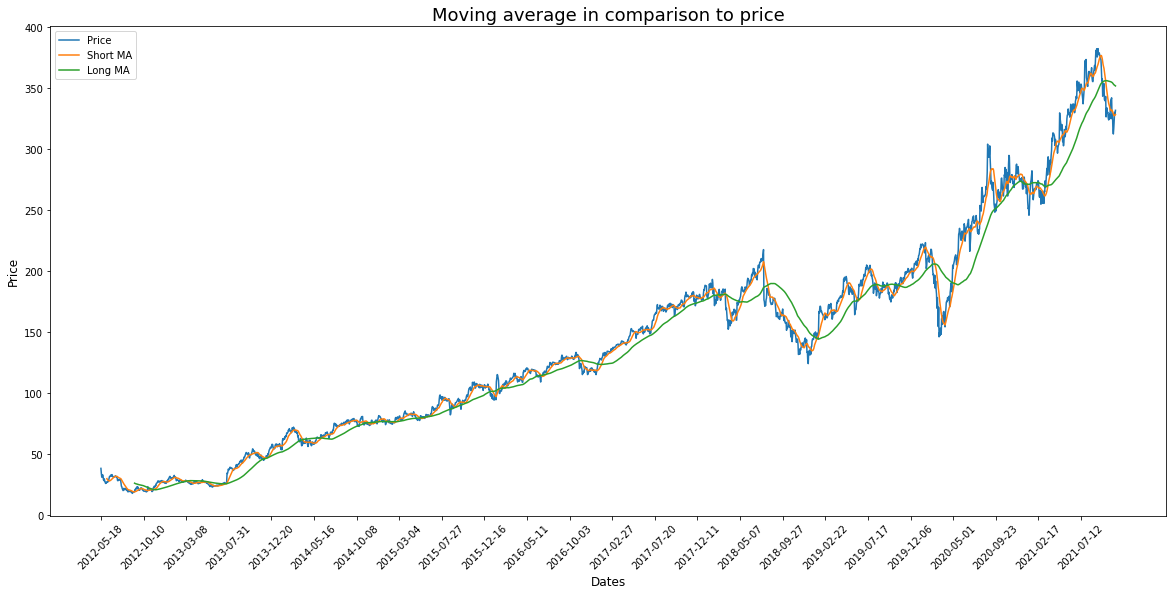

In [7]:
plt.figure(figsize=(20,9))

plt.xlabel('Dates', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Moving average in comparison to price', fontsize=18)

plt.plot(meta.Date, meta.Close,label='Price')
plt.plot(meta.Date, short_MA.Close, label='Short MA')
plt.plot(meta.Date, long_MA.Close,label='Long MA')

plt.xticks(range(0, meta.shape[0],100), meta.Date.loc[::100], rotation=45)

plt.legend()
plt.show()

From the analysis above, we have decided that for this project, including the entire date range will be beneficial. This is because there is a variation in patterns across the years. All of it can be taken into account when training our models.

### Part 3: Methodology

#### Section 1: Multilayer perceptron model (Model 1)

The first model is a multilayer perceptron model. In this model, we use the opening, highest, lowest price, and volume of Meta stocks to predict the closing price on the same day. 

In figure [NO], we've drawn out the simple structure of our model consisting of one input, hidden, and output layer. The forward propagation and backward propagation process for this model can be expressed as the following:

When building all our MLP models, we decided to use fully-connected or linear layers, along with the reLU activation function. Although our models are simple, we found that fully connected layers would serve our model better. The main reason for this is that fully connected layers would update all the weights in back-propogation since all neurons are connected. As for our activation function (AF) choice, we identified the advantages and limitations of AFs before deciding on the reLU function. A major downside of the reLU function is that it can't update weights during the back propagation if its inputs are negative. Fortunately for our case, stock prices can be low, but they will never be in the negative range. The main advantage of the reLU function is that it accelerates the convergence of stochastic gradient descent as compared to functions like sigmoid and tanh. 

#### Section 2: Multilayer perceptron model with the sliding window method (Model 2)

As an investor, predicting the closing price given today's information is only helpful in the short term. But we want to predict prices in the longer term to act as an investor who plans to invest large amounts. Therefore, our previous model isn't very useful.

A good model should use the stock's past information to predict today's price. For starters, we can try to use the closing price of Meta in the last $t-1$ days to predict the closing price on the $t$-th day. We've decided to use the closing price of the last 14 days to predict the price on the day after the 14 days. Therefore, the second MLP model will have 14 inputs. This model aims to predict the closing price given the prices of the last 14 days. We can achieve this goal by using the sliding window method.

*Sliding window method*

We explained the rough idea of a sliding window above. The sliding window method works by taking a window of a set size. For example, let's assume we had a dataset of $[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]$ and a window size of five. We could make the following datasets using the window:$[1, 2, 3, 4, 5]$, $[2, 3, 4, 5, 6]$, $[3, 4, 5, 6, 7]$ etc. This pattern continues until we reach the end of the dataset. This method essentially slides the window to create subsets of our original datset. We can apply this to our Meta dataset to generate 14 day inputs. 

#### Section 3: Recurrent neural network (RNN) model with the sliding window method (Model 3)

For our third model, we've built a simple recurrent neural network model using the sliding window method to predict prices. The main difference between the RNN and MLP models is that RNNs have an extra hidden state. 

Figure [NO] shows the structure of our RNN model.

To breakdown how our RNN model works, we can take an example of one subset of our data. We have 0 to t-1 day inputs, $P =$ {$p_{0},...,p_{t-1}$}. We feed the RNN model these inputs one by one, and it produces a hidden state for each input. We then feed the current input, $p_{t}$, and the hidden state from the previous input, $h_{t-1}$, to create the next hidden state, $h_{t}$. We can represent the hidden state at time t with the following expression: 

$$h_{t} = RNN(p_{t}, h_{t-1}) $$.

#### Section 4: LSTM model with the sliding window method (Model 4)

Before we build our LSTM network, we need to explore recurrent neural networks (RNN) further. LSTM networks are an extension built to solve one of the limitations of RNNs. 

An RNN functions similarly to the way a human does. Humans learn new things based on their previous knowledge. They don't think from scratch in every instance. Using this example, RNNs address this memory issue by storing information about the past. This RNN feature makes it useful for stock market predictions. In technical analysis of stocks, we use past information on stocks like their opening, closing prices, volumes etc. In an RNN model, we can take information at time $t-1$ and concatenate it to our input at time $t$ to predict the stock's price at time $t+1$. 

However, the limitation of RNNs is their vanishing gradient problem. As explained earlier, RNNs retain all information from the past. If we refer back to figure [NO], every single neuron in the model has contributed to the output. When the model is updated, it would have to propagate back through all these neurons.

[Formula for vanishing gradient]

LSTM solves the vanishing gradient problem of RNNs. We'll be using the nn.LSTM class to construct our LSTM model. The nn.LSTM class applies a sequence to our inputs. We can look at figure 3.4.1 below to visualise the sequence.

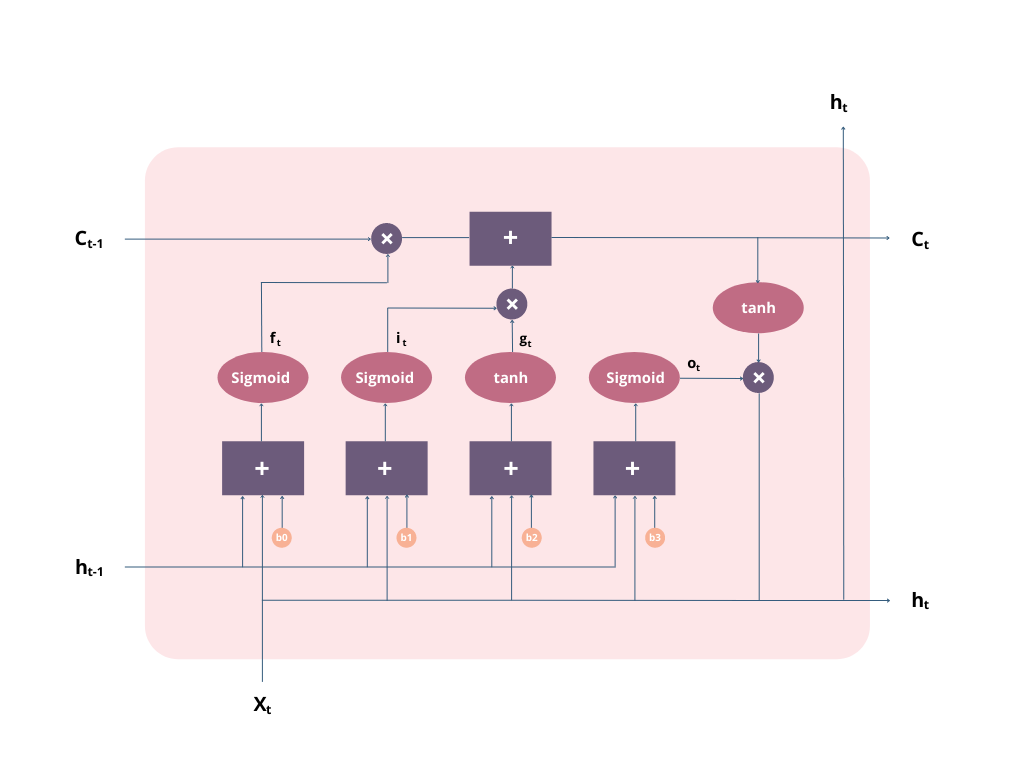

|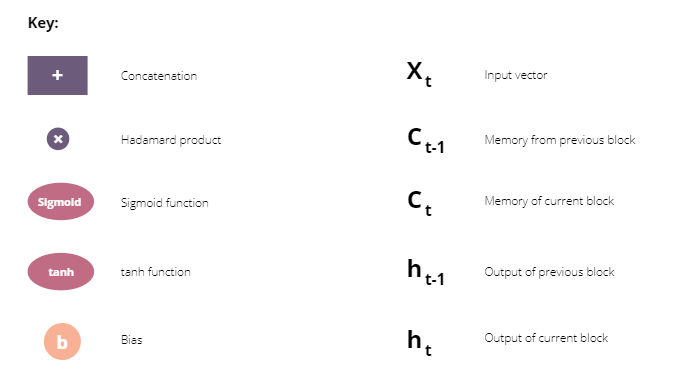|
|:--:| 
| *figure 3.4.1* |

There are three gates in the LSTM sequence we're using. The three gates are the input, forget and output gates. All these gates are present in each block. There are respective blocks for each timeframe. 

1. Input gate

$$i_{t} = \sigma(W_{ii}X_{t} + b_{ii} + W_{hi}h_{t-1} + b_{hi})$$

$$g_{t} = tanh(W_{ig}X_{t} + b_{ig} + W_{hg}h_{t-1} + b_{hg})$$

2. Forget gate

The forget gate takes the input for the current block, $X_{t}$ combined with the hidden state of the previous block, $h_{t-1}$. We squish these combined factors into the sigmoid function that returns a value between 0 and 1. A value closer to 0 indicates that we do not need to keep a lot of information from this state because it is unimportant, while a value closer to 1 indicates the opposite. The above explanation can be denoted by the following expression: 

$$f_{t} = \sigma(W_{ii}X_{t} + b_{ii} + W_{hi}h_{t-1} + b_{hi})$$

where $\sigma$ is the sigmoid function, $W_{ii}$ are the weights for the input at time $t$, $X_{t}$ are the inputs at time $t$, $b_{ii}$ are the biases for the input $X_{t}$, $W_{hi}$ are the weights for [explain], $h_{t-1}$ is the hidden state at time $t - 1$, and $b_{hi}$ are the biases for [explain].

The forget gate plays it's role when we're calculating which memory to retain in this block i.e. $C_{t}$. The memory of this current block be calculate this way:

$$C_{t} = f_{t} [] C_{t-1} + i_{t} [] g_{t}$$

where $C_{t-1}$ is the memory from the previous block, and $g_{t}$ is [explain]. We want the Hadamard product of the forget gate and the memory gate of the previous state to decide what information to keep from the previous block. We then add this to the Hadamard product of the input gate and current cell's state to decide what information to keep from the state at time $t$. When we combine both results, we get $C_{t}$, the memory for this block.

3. Output gate

The output gate compromises of the current block's input and memory state. When we get the Hadamard product of both of these values, we end up with the relevant information in this block. The output can be represented this way:

$$o_{t} = \sigma(W_{io}X_{t} + b_{io} + W_{ho}h_{t-1} + b_{ho})$$

We can finally computate the hidden state of the current block with the output gate's computation with the following expression:

$$h_{t} = o_{t} [] tanh(c_{t})$$

In this LSTM network, what we're essentially doing is implementing this entire sequence to calculate the hidden states of the RNN model we built before.

#### Results

| Parameters | MLP1 | MLP2 | RNN | LSTM |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Number of hidden layers | 1 | 1 | 1 | 1
| Number of neurons in the hidden layers | 2, 10, 32 | 2, 10, 32 | 2, 10, 32 | 2, 10, 32 |
| Epochs | 1, 5, 25, 100 | 1, 5, 25, 100 | 1, 5, 25, 100 | 1, 5, 25, 100 |
| Optimiser | SGD | SGD | Adam | Adam |
| Loss function | MSE | MSE | MSE | MSE |
| Window size | None | 7, 14, 30| 1, 7, 14, 30 | 1, 7, 14, 30 |
| Activation function | Relu | Relu | tanh | tanh |
| Batch size | 1 | 1 | 1 | 1 
| Dropout probability | 0.0 | 1 | 0.0 | 0.0 |

| **Model** | Parameters | Training RMSE | Testing RMSE | 
| ----------- | ----------- | ----------- | ----------- | 
| **MLP1** | 1 | 1 | 1 | 
| **MLP2** | 2, 10, 32 | 2, 10, 32 | 2, 10, 32 | 
| **RNN** | 1, 5, 25, 100 | 1, 5, 25, 100 | 1, 5, 25, 100 |
| **LSTM** | SGD | SGD | SGD |


#### Conclusion